# Tarea 6

## Punto 1

OneHotEncoding es la tecnica en la que valores categoricos son transformados en valores numericos (especificamente valores binarios) con el proposito de hacerlos utilizables por modelos matematicos y de machine learning, como datos que sean leibles.

## Punto 2 (Titanic)

In [1]:
import pandas as pd
import numpy as np
titanic = pd.read_csv("./Titanic.csv")
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


Importamos la libreria de sklearn para preprocesamiento de valores categoricos

In [2]:
from sklearn.preprocessing import OneHotEncoder

Separamos los valores que son el objetivo

In [3]:
survived = (titanic["Survived"]).to_numpy()

Creamos la codificacion de los valores categoricos con las columnas importantes del data set

In [4]:
preEncodedconditions = titanic[["Pclass","Sex","SibSp","Parch","Embarked"]]
x = preEncodedconditions.to_numpy()
encoder = OneHotEncoder().fit(x)
conditions = encoder.transform(x).toarray()
fares = titanic["Fare"].to_numpy().reshape(-1,1)
combinationResult = np.concatenate((conditions,fares),axis=1)

Hacemos el modelo de regresion lineal con sus valores de prueba y entrenamiento.

Y evaluamos que tan bueno es para ver si el valor resultado se acerca un poco a la realidad

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(combinationResult,survived,test_size=0.33,random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7966101694915254

Acomodamos los valores correspondientes en la estructura de datos para que se puedan codificar correctamente

In [6]:
toPredict = pd.DataFrame({
    "Pclass":[1], 
    "Sex" : ["female"], 
    "SibSp": [0],
    "Parch": [0],
    "Embarked": ["C"]
})
toPredictEncoded = encoder.transform(toPredict.to_numpy()).toarray()
toPredictEncodedCombination = np.concatenate((toPredictEncoded,[[7.5]]),axis=1)

Solicitamos al modelo de regresion lineal que nos prediga con el objetivo si la persona en cuestion sobreviviria.

**R :** Si

In [7]:
predictionResult = lr.predict(toPredictEncodedCombination)[0]
print(f"The answer is {predictionResult}")
message = "Meaning "
message += "Death" if predictionResult == 0 else "Life!"
print(message)

The answer is 1
Meaning Life!


## Punto 3

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("./q1_data.csv",names=["F1","F2","Binary_Label"])
df.head()

,F1,F2,Binary_Label
0,0.893841,0.448383,0.0
1,-0.763892,0.237633,1.0
2,-0.285130,-0.747463,1.0
3,-0.844328,-0.535827,0.0
4,0.462058,-0.653071,1.0


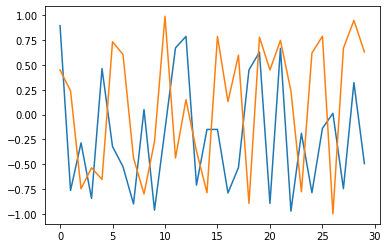

In [10]:
subsection = 30
indexes = df.index[:subsection]
plt.plot(indexes,df["F1"][:subsection])
plt.plot(indexes,df["F2"][:subsection])

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [12]:
logReg = LogisticRegression()
cv_results = cross_validate(logReg,df[["F1","F2"]],df["Binary_Label"],cv=10,return_estimator=True)
# print(cv_results)
temp = np.where(cv_results["test_score"] == max(cv_results["test_score"]))[0][0]
bestModel = cv_results["estimator"][temp]
result = {
    "fitTime"    : max(cv_results["fit_time"])/len(cv_results["fit_time"]),
    "scoreTime"  : max(cv_results["score_time"])/len(cv_results["score_time"]),
    "testScore"  : max(cv_results["test_score"])/len(cv_results["test_score"])
}
print(result)

{'fitTime': 0.0006140947341918945, 'scoreTime': 0.00025758743286132815, 'testScore': 0.047}


In [13]:
bestModel.score(df[["F1","F2"]],df["Binary_Label"])

0.5